In [94]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import accuracy_score

In [95]:
df=pd.read_csv('/content/spam.csv', encoding='latin-1')

In [96]:
df.sample()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
491,spam,Congrats! 1 year special cinema pass for 2 is ...,NaN,NaN,NaN


In [98]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [99]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3627,ham,Meeting u is my work. . . Tel me when shall i ...,NaN,NaN,NaN
2308,spam,Moby Pub Quiz.Win a å£100 High Street prize if...,NaN,NaN,NaN
3029,ham,"Also sir, i sent you an email about how to log...",NaN,NaN,NaN
5311,ham,K.k:)i'm going to tirunelvali this week to see...,NaN,NaN,NaN
1419,ham,\Speak only when you feel your words are bette...,NaN,NaN,NaN


In [109]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [115]:
df.rename(columns={'v1':'target','v2':'SMS'},inplace=True)

In [119]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [120]:
df['target']=encoder.fit_transform(df['target'])

Here ham is represented as 0
And spam by 1

In [121]:
df.head()

,target,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isnull().sum()

target    0
SMS       0
dtype: int64

In [122]:
df.duplicated().sum()

0

In [123]:
df=df.drop_duplicates(keep='first')

In [124]:
df.duplicated().sum()

0

In [125]:
df.shape

(5169, 2)

In [126]:
df.head()

,target,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [127]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

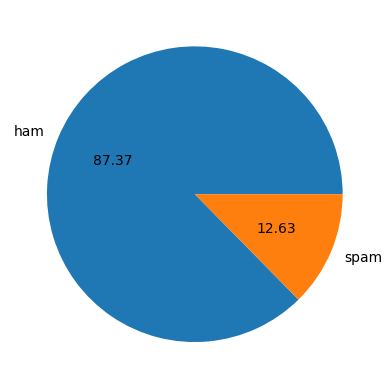

In [129]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [130]:
X=df['SMS']
Y=df['target']

In [131]:
print( X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: SMS, Length: 5169, dtype: object


In [132]:
print(Y)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5169, dtype: int64


In [133]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)

In [134]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)


(5169,)
(4135,)
(1034,)


In [135]:
print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)

(5169,)
(4135,)
(1034,)


In [136]:
feature_extraction=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)

In [137]:
X_train_features=feature_extraction.fit_transform(X_train)
X_test_features=feature_extraction.transform(X_test)

Y_train=Y_train.astype('int')
Y_test=Y_test.astype('int')

In [138]:
print(X_train_features)

  (0, 2697)	0.7205755344386542
  (0, 6409)	0.5950532917415522
  (0, 1825)	0.35592482233751443
  (1, 5438)	0.27399320458839144
  (1, 4583)	0.27399320458839144
  (1, 4438)	0.22516921191243092
  (1, 5036)	0.27399320458839144
  (1, 2274)	0.27399320458839144
  (1, 2920)	0.23390504161994488
  (1, 3610)	0.27399320458839144
  (1, 4984)	0.19732502227978832
  (1, 4180)	0.23390504161994488
  (1, 7137)	0.24133495616477563
  (1, 6940)	0.27399320458839144
  (1, 203)	0.27399320458839144
  (1, 6941)	0.27399320458839144
  (1, 453)	0.25698446420786897
  (1, 4333)	0.15929709793058355
  (1, 1885)	0.22516921191243092
  (2, 953)	0.26160275768603725
  (2, 4856)	0.26160275768603725
  (2, 5786)	0.26160275768603725
  (2, 2459)	0.22436535516409714
  (2, 4960)	0.26160275768603725
  (2, 5976)	0.1902832473629628
  :	:
  (4132, 6862)	0.11085392369947865
  (4132, 5612)	0.14854309693836068
  (4132, 3865)	0.16898098428277844
  (4133, 6457)	0.6154177820886059
  (4133, 5320)	0.5530764956488926
  (4133, 2311)	0.4238274869

In [139]:
model=svm.SVR()

In [140]:
model.fit(X_train_features,Y_train)

SVR()

In [141]:
pred_training_data=model.predict(X_train_features)

In [154]:
pred_training_data = np.round(pred_training_data).astype(int)

In [155]:
accuracy_of_training_data=accuracy_score(Y_train,pred_training_data)

In [156]:
print(accuracy_of_training_data)

1.0


In [ ]:
pred_testing_data=model.predict(X_test_features)

In [146]:
accuracy_on_test_data=accuracy_score(Y_test,pred_testing_data)

In [147]:
print(accuracy_on_test_data)

0.9787234042553191


In [1]:
input=["Hey, How are you?"]
input_data_features=feature_extraction.transform(input)
prediction=model.predict(input_data_features)
prediction = (prediction >= 0.5).astype(int)
print(prediction)
if(prediction[0]==1):
  print('Spam')
else:
  print('Ham')

NameError: name 'feature_extraction' is not defined